In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
path = 'C:/Users/x1/Downloads/Sales Reporting/'
os.listdir(path)

['sales2019_1.csv',
 'sales2019_10.csv',
 'sales2019_11.csv',
 'sales2019_12.csv',
 'sales2019_2.csv',
 'sales2019_3.csv',
 'sales2019_4.csv',
 'sales2019_5.csv',
 'sales2019_6.csv',
 'sales2019_7.csv',
 'sales2019_8.csv',
 'sales2019_9.csv']

In [3]:
frames = []
for file in os.listdir(path):
    filepath = path + file
    df1 = pd.read_csv(filepath)
    frames.append(df1)
    result = pd.concat(frames)
result

df = result
df.to_csv('C:/Users/x1/Downloads/Sales Reporting/Annual Sale 2019', index = False)


In [4]:
df = pd.read_csv('C:/Users/x1/Downloads/Sales Reporting/Annual Sale 2019')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


## Add column month

In [5]:
df['Month']= df['Order Date'].str[0:2]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [6]:
df = df.dropna(how='all')


In [7]:
df = df[df['Month'] != 'Or']

## Reporting
### Task 1: Highest month sale and how much was it 

In [8]:
# chuyển đổi datatype
df.head()
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast='integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast='float')


In [9]:
# di chuyển cột sale
df['Sale']= df['Quantity Ordered']*df['Price Each'] 
moving_column = df.pop('Sale')
df.insert(4, 'Sale', moving_column )
df


,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.990000,8.970000,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700.000000,700.000000,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700.000000,700.000000,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.989990,379.989990,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [10]:
fullsale = df.groupby('Month').sum()['Sale']
fullsale.max()

4613443.5

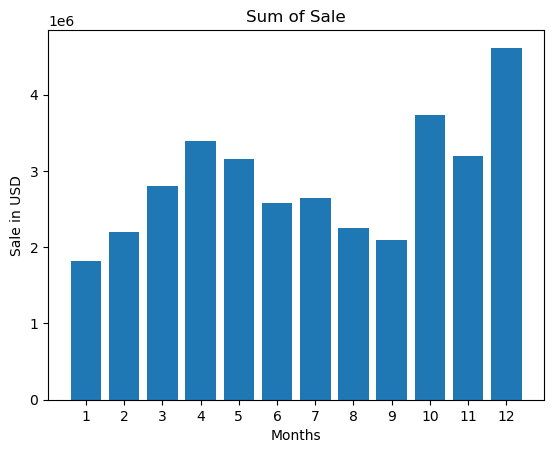

In [11]:
month = range(1,13)
ax = plt.subplot()
ax.bar(x=month, height=fullsale)
ax.set(title ='Sum of Sale', xticks = month ,xlabel='Months', ylabel='Sale in USD');


### task 2: What city has the best sale


In [12]:
address_city = lambda x:x.split(',')[1]

In [13]:
df['city']= df['Purchase Address'].apply(address_city)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,Month,city
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin


In [34]:
df.groupby('city').sum()['Sale']
sales_value_city = df.groupby('city').sum()['Sale']


In [36]:
sales_value_city.head(10)

city
 Atlanta          2795498.50
 Austin           1819581.75
 Boston           3661642.00
 Dallas           2767975.50
 Los Angeles      5452571.00
 New York City    4664317.50
 Portland         2320490.50
 San Francisco    8262204.00
 Seattle          2747755.50
Name: Sale, dtype: float32

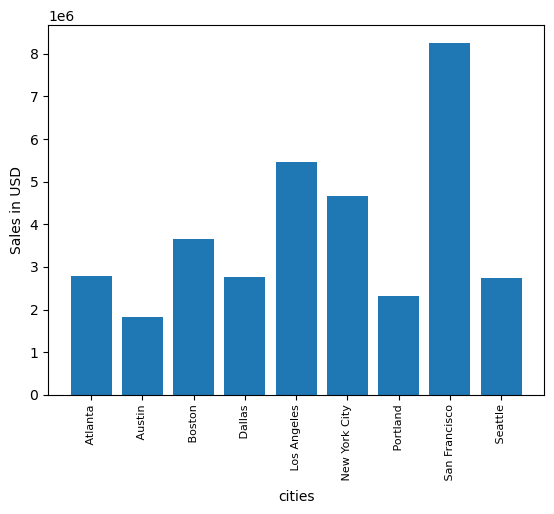

In [33]:
cities = [city for city, sales in sales_value_city.items()]
plt.bar(x=cities, height=sales_value_city)
plt.xticks(cities, rotation=90, size=8)
plt.xlabel('cities')
plt.ylabel('Sales in USD')
plt.show()

### Task3: Top 10 products which are sold together 

In [14]:
df_dup =df[df['Order ID'].duplicated(keep =False)]
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,Month,city
41,141275,USB-C Charging Cable,1,11.95,11.95,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",01,Austin
42,141275,Wired Headphones,1,11.99,11.99,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",01,Austin
57,141290,Apple Airpods Headphones,1,150.00,150.00,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",01,Los Angeles
58,141290,AA Batteries (4-pack),3,3.84,11.52,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",01,Los Angeles
133,141365,Vareebadd Phone,1,400.00,400.00,01/10/19 11:19,"20 Dogwood St, New York City, NY 10001",01,New York City


In [15]:
group_product = lambda product : ', '.join(product)

In [16]:
df_dup['all product'] = df_dup.groupby('Order ID')['Product'].transform(group_product)
df_dup.head()

C:\Users\x1\AppData\Local\Temp\ipykernel_13708\2522240770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['all product'] = df_dup.groupby('Order ID')['Product'].transform(group_product)


,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,Month,city,all product
41,141275,USB-C Charging Cable,1,11.95,11.95,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",01,Austin,"USB-C Charging Cable, Wired Headphones"
42,141275,Wired Headphones,1,11.99,11.99,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",01,Austin,"USB-C Charging Cable, Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,150.00,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,"Apple Airpods Headphones, AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,11.52,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,400.00,01/10/19 11:19,"20 Dogwood St, New York City, NY 10001",01,New York City,"Vareebadd Phone, Wired Headphones"


In [24]:
df_dup['all product'].value_counts().head(10)

all product
iPhone, Lightning Charging Cable                        1764
Google Phone, USB-C Charging Cable                      1712
iPhone, Wired Headphones                                 722
Vareebadd Phone, USB-C Charging Cable                    624
Google Phone, Wired Headphones                           606
iPhone, Apple Airpods Headphones                         572
Google Phone, Bose SoundSport Headphones                 322
Google Phone, USB-C Charging Cable, Wired Headphones     231
Vareebadd Phone, Wired Headphones                        208
iPhone, Lightning Charging Cable, Wired Headphones       168
Name: count, dtype: int64